In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [458]:
## DATA preparing

In [459]:
df = pd.read_csv("./data/mpg.csv")

In [460]:
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [461]:
df.dropna(subset=["weight"],inplace=True)
df.dropna(subset=["mpg"],inplace=True)

In [462]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500


In [463]:
mdf = df[['mpg','cylinders','horsepower','weight']]

In [464]:
# x1  , x2 , x3
x = mdf[['cylinders','horsepower','weight']]
y = mdf['mpg']

In [465]:
x.head()
y.head()

0    18.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: mpg, dtype: float64

In [466]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [467]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(273, 3)
(273,)
(118, 3)
(118,)


In [468]:
## 다중 회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor

In [469]:
lr = LinearRegression()
#lr = BayesianRidge()
#lr = TweedieRegressor()

In [470]:
# 학습 시작
lr.fit(x_train, y_train)

TweedieRegressor()

In [471]:
r_square = lr.score(x_test,y_test)
print(r_square)

0.6953379816636598


In [472]:
print(lr.coef_, lr.intercept_)

[-0.15778589 -0.05819357 -0.00528866] 45.83999495873324


In [473]:
y_hat = lr.predict(x_test)

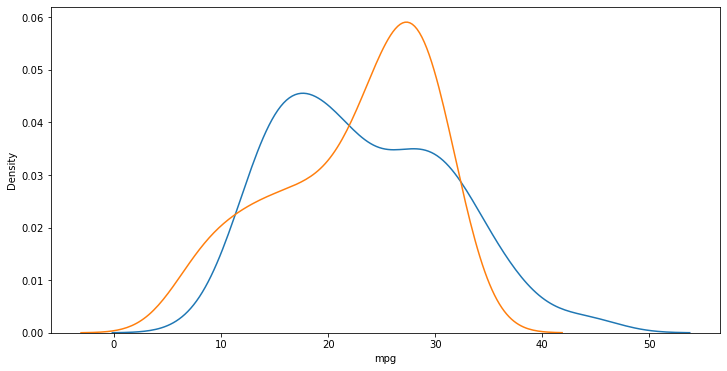

In [474]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label="y_hat", ax=ax1)
plt.show()